    主要介绍scipy.spatial模块中提供的K-d树、凸包、沃罗诺伊图、德劳内三角化等空间算法类使用方法。

## 1、计算最近旁点

### 一维数组

对于一维已排序数组，可以使用二分法快速找到与指定数值最近的数值。也可以用numpy.searchsorted()搜索距0.5最近的数。

numpy.searchsorted()返回一个序列中与设定值最近值的索引，第一个参数为序列，第二个参数为设定值。

In [1]:
import numpy as np

x = np.sort(np.random.rand(100)) #np.sort用于排序
idx = np.searchsorted(x,0.5)
print(x[idx],x[idx-1])

0.5042302489023007 0.4941039512924118


### N维数组

##### random.uniform()
函数原型:  numpy.random.uniform(low,high,size)

功能：从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.

* low: 采样下界，float类型，默认值为0；
* high: 采样上界，float类型，默认值为1；
* size: 输出样本数目，为int或元组(tuple)类型，例如，size=(m,n,k), 则输出m*n*k个样本，缺省时输出1个值。

返回值：ndarray类型，其形状和参数size中描述一致。

#### cKDTree搜索N维空间最近点
scipy.spatial模块提供的cKDTree类使用K-d树快速搜索N维空间的最近点。

下面例子中，用平面上随机100个点创建**cKDTree对象**，并对其搜索与target中每个点距离最近的三个点。**cKDTree.query()**返回两个数组，dist和idx，dist[i,:]是距离target[i]最近的3个点的距离，而idx[i,:]表示最近点的下标：

[[0.0870236  0.14934326 0.17442956]
 [0.08958861 0.19807073 0.20759883]
 [0.10730195 0.22737023 0.24358185]
 [0.0626605  0.10598796 0.16832695]
 [0.10102212 0.14791865 0.15227049]]
[[89 68 44]
 [52 92 85]
 [43 24 63]
 [60  3 34]
 [ 8 88 29]]
与[0. 0.]最近的三个点：
[-0.08297159  0.02624542]距离：0.08702359547500765
[0.13349985 0.06694177]距离：0.1493432632925265
[0.11515638 0.13101404]距离：0.17442955557244105
与[0.5 0.5]最近的三个点：
[0.56389824 0.43720562]距离：0.08958860857125411
[0.69752814 0.48534915]距离：0.19807073179524717
[0.56542964 0.69701836]距离：0.2075988270715175
与[-0.5 -0.5]最近的三个点：
[-0.39387488 -0.51584825]距离：0.10730194953429625
[-0.34897672 -0.6699682 ]距离：0.22737022750211547
[-0.70475962 -0.63193036]距离：0.24358185255869644
与[-0.5  0.5]最近的三个点：
[-0.5624613   0.50499234]距离：0.06266049525594075
[-0.60387427  0.52106142]距离：0.10598796000290611
[-0.33856138  0.54766059]距离：0.1683269478646066
与[ 0.5 -0.5]最近的三个点：
[ 0.44351063 -0.41624786]距离：0.10102211993043746
[ 0.50092922 -0.64791573]距离：0.14791865213193345
[ 0.6

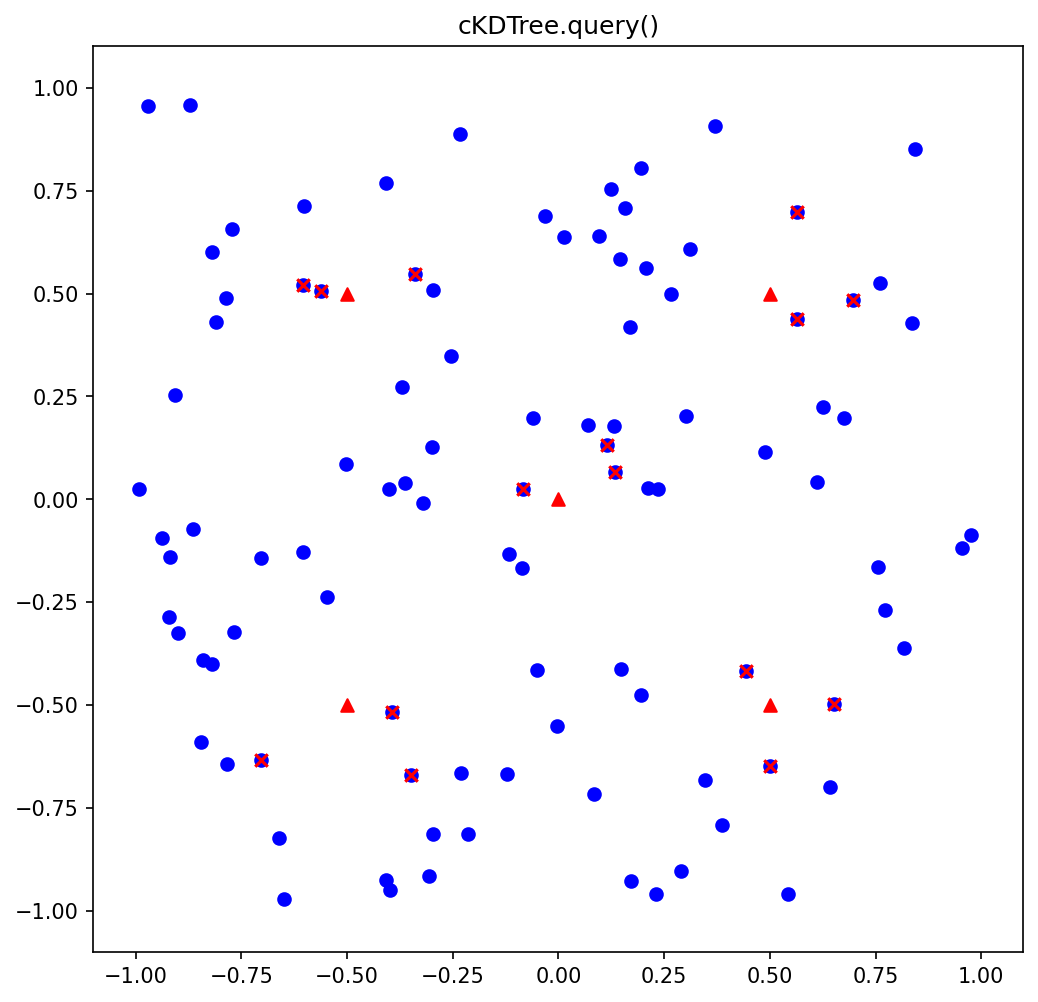

In [2]:
from scipy import spatial 
import matplotlib.pyplot as plt

np.random.seed(10)
N=100
points = np.random.uniform(-1,1,(N,2)) #random.uniform(-1,1,(N,2))：均匀产生生[-1,1)(左闭右开)之间N*2个随机数.
kd = spatial.cKDTree(points) #创建cKDTree对象

targets = np.array([(0,0),(0.5,0.5),(-0.5,-0.5),(-0.5,0.5),(0.5,-0.5)])
dist ,idx = kd.query(targets,3) #求解最近点

print(dist)
print(idx)
for i in range(5):
    print("与" + str(targets[i]) + "最近的三个点：")
    for j in range(3):
        print(str(points[idx[i][j]]) + "距离："+ str(dist[i][j]))
        
plt.figure(figsize=(8,8), dpi=150)
plt.scatter(points[:,0],points[:,1],color="blue",marker='o')
plt.scatter(targets[:,0],targets[:,1],color="red",marker='^')
plt.scatter(points[idx[:,:]][:,:,0],points[idx[:,:]][:,:,1],color="red",marker='x')

plt.title("cKDTree.query()")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

#### cKDTree.query_ball_point()搜索指定点一定范围内所有点

参数有两个，第一个参数为目标点列表，第二个参数为距离范围，返回值为一个嵌套数组，数组中每个数组分别为满足每个目标点距离的点的下标。

**cKDTree.query_ball_tree()**可以在两个K-d树之间搜索距离小于给定值的所有的点对。

[list([12, 31, 44, 68, 89, 93]) list([52, 92]) list([43])
 list([3, 34, 60]) list([8, 29, 88])]


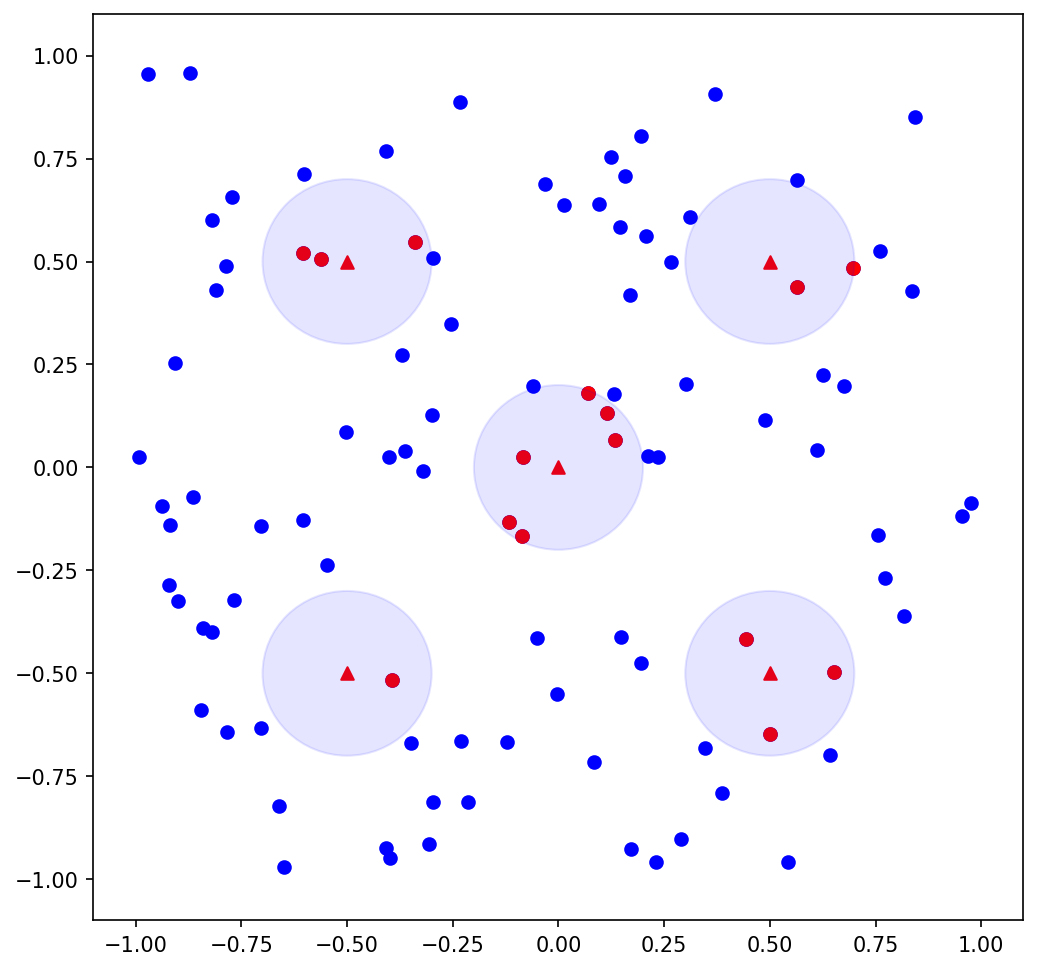

In [3]:
r = 0.2
idx2 = kd.query_ball_point(targets,r)
print(idx2)
s = []
for i in range(len(idx2)):
    for j in range(len(idx2[i])):
        s.append(idx2[i][j])
        
from matplotlib.patches import Circle ##添加库

fig = plt.figure(figsize=(8,8), dpi=150)
ax = fig.add_subplot(111)#创建子图
for i in range(5):
    circle = Circle(xy=(targets[i][0], targets[i][1]), radius=0.2, alpha=0.1, color='b')#以target创建目标点范围，
    ax.add_patch(circle)#将圆形贴图添加到子图
    
plt.scatter(points[:,0],points[:,1],color="blue",marker='o')
plt.scatter(targets[:,0],targets[:,1],color="red",marker='^')
plt.scatter(points[s[:]][:,0],points[s[:]][:,1],color="red",marker='o')

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

#### cKDTree.query_pairs()搜索距离小于指定值的每一对点

返回值为满足要求的每个下标对的一个集合。

<class 'numpy.ndarray'>


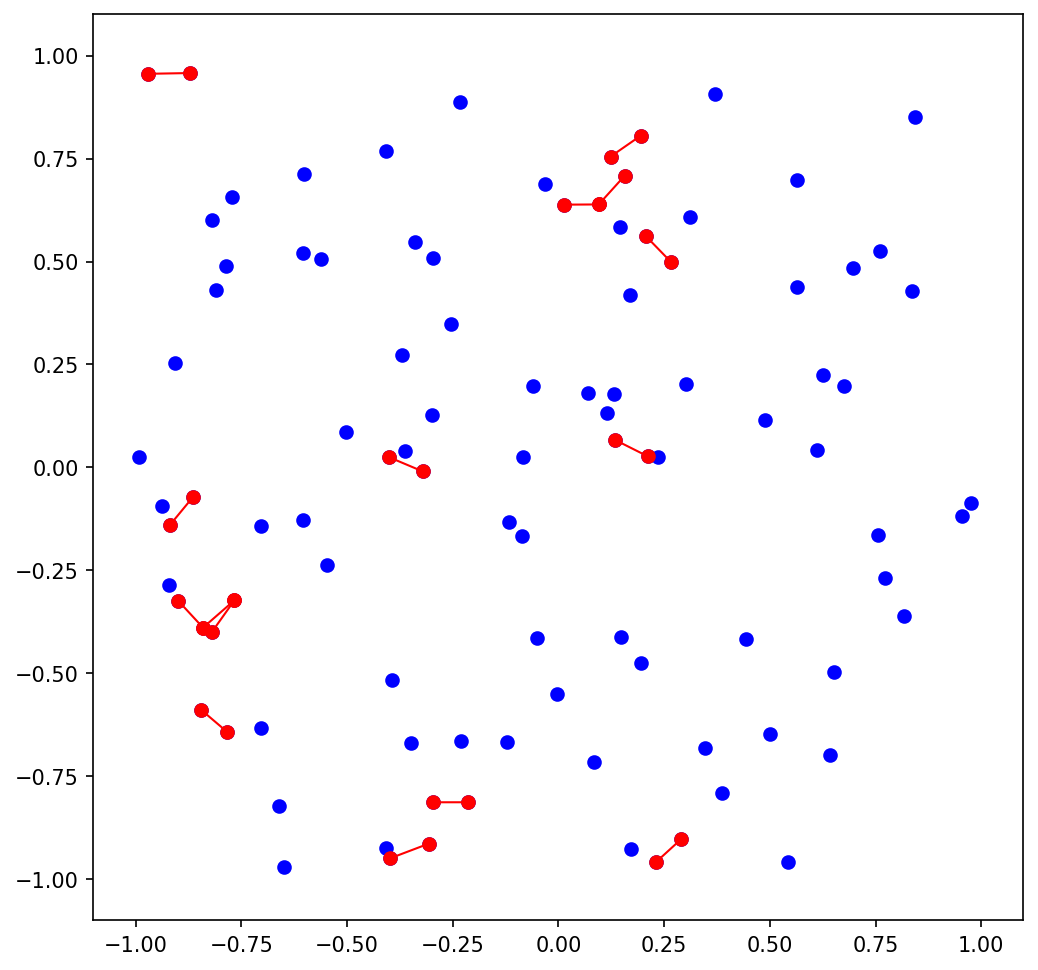

In [4]:
idx3 = kd.query_pairs(0.1)-kd.query_pairs(0.08) #找出所有距离在0.08-0.1之间的点对。
idx3 = list(idx3)
Idx3 = []
for i in range(len(idx3)):
    x = list(idx3[i])
    Idx3.append(x)#将下标集合转化为列表
idx3 = np.array(Idx3)#将列表转化为数组对象
print(type(idx3))
# print(points[idx3[:,:]])

fig = plt.figure(figsize=(8,8), dpi=150)
plt.scatter(points[:,0],points[:,1],color="blue",marker='o')
plt.scatter(points[idx3[:,:]][:,:,0],points[idx3[:,:]][:,:,1],color="red",marker='o')#绘制满足要求点
for i in range(len(idx3)):
#     print(points[idx3[i,:]])
    plt.plot(points[idx3[i,:]][:,0],points[idx3[i,:]][:,1],color='red',linewidth=1.0, linestyle="-")#绘制线段

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

### distance子模块计算点距

distance中的pdist()函数计算一组点中每对点之间的距离，其返回值是一个压缩之后的一维数组，所以需要用squareform()将其转化为二维数组。dist1[i,j]是points中下标为i和j的两个点之间的距离。

distance中的cdist()函数计算两组点中每对点之间的距离，其返回值是一个二维数组，dist2][i,j]是point[i]和targets[j]之间的距离。

In [5]:
from scipy.spatial import distance

dist1 = distance.squareform(distance.pdist(points))
dist2 = distance.cdist(points,targets)
print(dist1.shape)
print(dist2.shape)

(100, 100)
(100, 5)


![pdist](.\pdist.png)

![cdist](.\cdist.png)

将distance.cdist()计算结果和cDKTree.query()计算结果进行比较。分别输出points中距targets点最近的点距。

In [6]:
print(dist[:,0])
print(np.min(dist2,axis = 0))

[0.0870236  0.08958861 0.10730195 0.0626605  0.10102212]
[0.0870236  0.08958861 0.10730195 0.0626605  0.10102212]


#### 利用distance.pdist()查找points最近的点对

**numpy.unravel_index(indices, dims, *order)**:其返回值为一个含若干个数组的元组（分别为各轴坐标）。作用：返回indices中每个值对应顺序的元素在维度为dims的数组中的下标索引。如：indices = [5,8],dims = (3,3),则 返回([1,2],[2,1])

    indices为一个数值列表；
    dims为设定数组的维度；
    order为索引方向，当order=‘C’时，按行主索引（默认）,当order=‘F’时，按列主索引。

**numpy.argmin(a, axis=None, out=None)**: 返回一个数组中首个最小值的下标。

    a : Input array 输入数组
    axis :可选。 默认将输入数组展平。否则，按照axis方向
    out : 可选。如果设置了某个数组b，则结果会输出到b中

(17, 33)
0.023689459280835202
[[-0.8190813  -0.39859989]
 [-0.84077382 -0.38908016]]
[-0.8190813  -0.84077382]


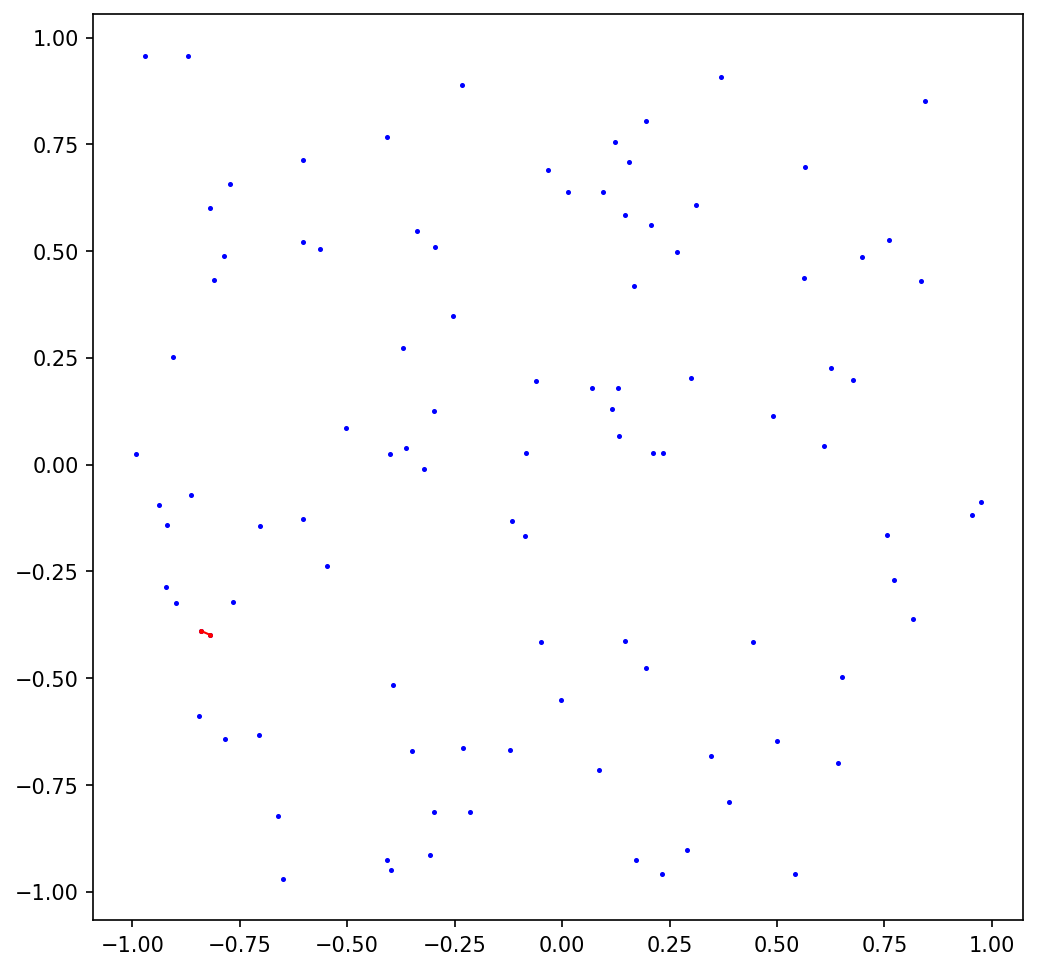

In [7]:
x = np.diag_indices(len(points))#diag_indices（）返回一个含两个元素的元组，两个元素分别为一个数组
dist1 [x] = np.inf#将数组dist1对角元素设置为无穷大
nearest_pair = np.unravel_index(np.argmin(dist1),dist1.shape)#找出距离最小的两个点的序号
print(nearest_pair)
print(dist1[nearest_pair])
nearest = np.array(nearest_pair)

fig = plt.figure(figsize=(8,8), dpi=150)
plt.scatter(points[:,0],points[:,1],color="blue",marker='o',s=2)
plt.scatter(points[nearest_pair,0],points[nearest_pair,1],color="red",marker='o',s=2)#绘制满足要求点
plt.plot(points[nearest[:]][:,0],points[nearest[:]][:,1],color='red',linewidth=1.0, linestyle="-")#绘制线段
print(points[nearest[:]])
print(points[nearest[:]][:,0])   

#### 使用cDKTree.query()快速查找K-d树中最近距离点对

In [8]:
dist4,idx4 = kd.query(points,2)
print("最近点对序号：" + str(idx4[np.argmin(dist4[:,1])]))
print("最近点对距离：" + str(np.min(dist4[:,1])))
# print("最近点对距离：" + str(np.min(dist4[:,1])))

最近点对序号：[17 33]
最近点对距离：0.023689459280835202


### K-d树搜索实例

numpy.clip(a, a_min, a_max, out=None)：用于设置一个数组的上下界，有三个必须参数。运算后，数组中小于第二个值的元素用第二个值代替，大于第三个值的元素用第三个值代替。
    
    a : array
    a_min : 要限定范围的最小值
    a_max : 要限定范围的最大值
    out : 要输出的array，默认值为None，也可以是原array

In [9]:
N = 1000000
start = np.random.uniform(0, 100, N)
span = np.random.uniform(0.01, 1, N)
span = np.clip(span, 2, 100)
end = start + span
print(np.min(start),np.max(start))
print(np.min(end),np.max(end))

8.590803772801081e-05 99.99995564465131
2.000085908037728 101.99995564465131


## 凸包

**ConvexHull**可以快速计算包含N维空间中点的集合的最小凸包。

下面二维的例子中：

    points2d：是一组二维平面上随机点；
    ch2d：是这些点的凸包对象；
    ConvexHull.simplices：是凸包每条边线的两个顶点在points2d中的下标，其形状为(凸包线段条数,2)；
    ConvexHull.vertices：是凸包每个顶点在points2d中的下标，其顺序为按照逆时针排列。

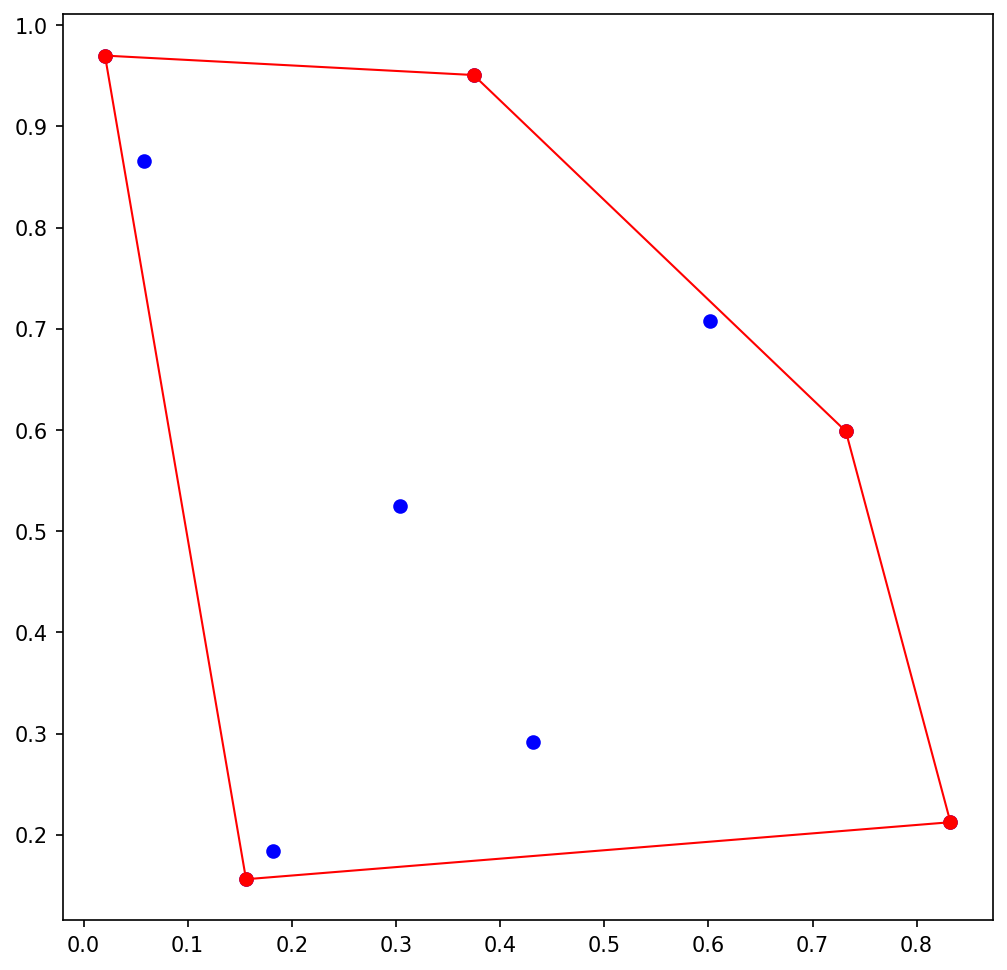

In [10]:
np.random.seed(42)
points2d = np.random.rand(10,2)
ch2d = spatial.ConvexHull(points2d)
# print(ch2d.simplices)
# print(ch2d.vertices)

fig = plt.figure(figsize=(8,8), dpi=150)
plt.scatter(points2d[:,0],points2d[:,1],color="blue",marker='o')
plt.scatter(points2d[ch2d.vertices][:,0],points2d[ch2d.vertices][:,1],color="red",marker='o')#绘制满足要求点
for i in range(len(ch2d.simplices)):
    plt.plot(points2d[ch2d.simplices[i]][:,0],points2d[ch2d.simplices[i]][:,1],color='red',linewidth=1.0, linestyle="-")#绘制线段
#     print(points2d[ch2d.simplices[i]])

#### 使用plt.Polygon()绘制凸包图形

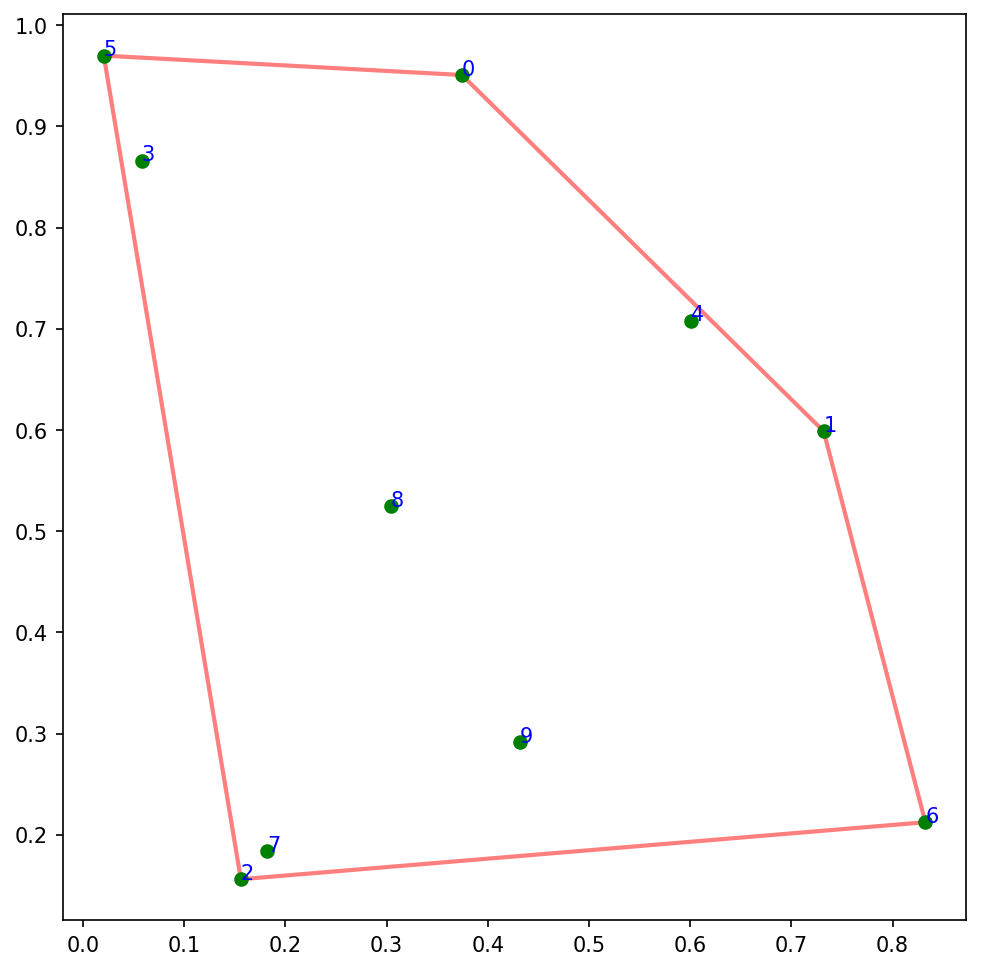

In [11]:
fig = plt.figure(figsize=(8,8), dpi=150)
ax = plt.subplot(aspect = 'equal')
poly = plt.Polygon(points2d[ch2d.vertices],fill = None,lw = 2,color = "r",alpha = 0.5)#创建多边形
plt.plot(points2d[:,0],points2d[:,1],'go')
for i ,pos in enumerate(points2d):#mnumerate：获取索引和值的方法
    plt.text(pos[0],pos[1],str(i),color = 'blue')#添加编号
ax.add_artist(poly)#添加多边形

 ### 三维凸包
 
 使用TVTK直观显示三维凸包,下面例子可以看出：此三维凸包有38个面，21个顶点。

In [12]:
np.random.seed(42)
points3d = np.random.rand(40,3)
ch3d =  spatial.ConvexHull(points3d)
print(ch3d.simplices.shape)
print(ch3d.vertices.shape)

(38, 3)
(21,)


## 沃罗诺伊图

    沃罗诺伊图(Vomnoi Diagram)是一种空间分割算法，它根裾指定的N个胞点将空间分割为N个区域，每个区域中的所有坐标点都与该区域对应的胞点最近。
    
使用spatial.Voronoi()可以获得目标点阵的德罗诺伊图信息。

In [73]:
points2d = np.array([[0.2,0.1],[0.5,0.5],[0.8,0.1],[0.5,0.8],[0.3,0.6],[0.7,0.6],[0.5,0.35]])
vo = spatial.Voronoi(points2d)
print(vo.vertices)
print(vo.regions)
print(vo.ridge_vertices)
print(vo.point_region)

[[0.5    0.045 ]
 [0.245  0.351 ]
 [0.755  0.351 ]
 [0.3375 0.425 ]
 [0.6625 0.425 ]
 [0.45   0.65  ]
 [0.55   0.65  ]]
[[-1, 0, 1], [-1, 0, 2], [], [6, 4, 3, 5], [5, -1, 1, 3], [4, 2, 0, 1, 3], [6, -1, 2, 4], [6, -1, 5]]
[[-1, 0], [0, 1], [-1, 1], [0, 2], [-1, 2], [3, 5], [3, 4], [4, 6], [5, 6], [1, 3], [-1, 5], [2, 4], [-1, 6]]
[0 3 1 7 4 6 5]


### 绘制沃罗诺伊图

使用spatial.voronoi_plot_2d()可以将沃罗诺伊图绘制出来，其中蓝色点为胞点，橘色点为Voronoi.vertices()中的点，也是每个区域顶点，虚线和实线将整个区域分成七个区域，以虚线为界的区域为无限区域，全部以实线为界的区域为有限区域。

    Voronoi.vertices()：区域的顶点坐标组成的一个列表
    Voronoi.regions(): 区域列表，列表中每个列表表示每个区域，内部整数为区域顶点在Voronoi.vertices()中的序号，含-1的区域为无限区域。
    Voronoi.ridge_vertices(): 区域分割线列表，每条分割线由Voronoi.vertices中的两个序号构成，包含-1的分割线为图中的虚线，其长度为无限长。
    Voronoi.point_region(): 其返回值为一个区域列表，point_region[i]表示第i个胞点（points2d[i]）所处的区域序号。

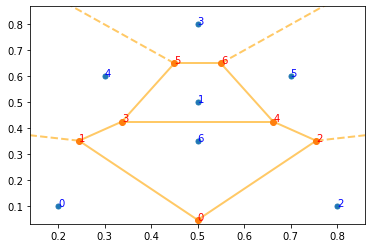

In [53]:
fig = spatial.voronoi_plot_2d(vo, line_colors='orange',line_width=2, line_alpha=0.6, point_size=10)

for i ,pos in enumerate(points2d):#mnumerate：获取索引和值的方法
    plt.text(pos[0],pos[1],str(i),color = 'blue')
for i ,pos in enumerate(vo.vertices):#mnumerate：获取索引和值的方法
    plt.text(pos[0],pos[1],str(i),color = 'red')

### 添加边界

    可以在外围添加四个点将整个区域包围之后再进行沃罗诺伊图算法。

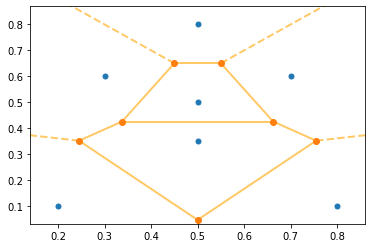

In [60]:
bound = np.array([[-100, -100], [-100,  100],
                      [ 100,  100], [ 100, -100]])
vo2 = spatial.Voronoi(np.vstack((points2d, bound)))
fig = spatial.voronoi_plot_2d(vo, line_colors='orange',line_width=2, line_alpha=0.6, point_size=10)

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.70588235e-01 4.94655843e-01 9.66718404e-01 1.00000000e+00]
 [1.66666667e-01 8.66025404e-01 8.66025404e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [8.33333333e-01 8.66025404e-01 5.00000000e-01 1.00000000e+00]
 [1.00000000e+00 4.94655843e-01 2.55842778e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


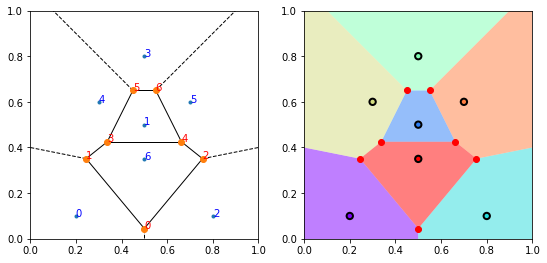

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5))
ax1.set_aspect("equal")
ax2.set_aspect("equal") #设置ax1、ax2的纵横比
spatial.voronoi_plot_2d(vo, ax = ax1)
for i, v in enumerate(vo.vertices):
    ax1.text(v[0], v[1], str(i), color="red") #添加顶点序号

for i, p in enumerate(points2d):
    ax1.text(p[0], p[1], str(i), color="blue")#添加胞点序号
 
n = len(points2d)
color = plt.cm.rainbow(np.linspace(0, 1, n))
print(color)
for i in range(n):
    idx = vo2.point_region[i]
    region = vo2.regions[idx]
    poly = plt.Polygon(vo2.vertices[region], facecolor=color[i], alpha=0.5, zorder=0)
    ax2.add_artist(poly)
ax2.scatter(points2d[:, 0], points2d[:, 1], s=40, c=color, linewidths=2, edgecolors="k") #绘制胞点
ax2.plot(vo2.vertices[:, 0], vo2.vertices[:, 1], "ro", ms=6) #绘制顶点

for ax in ax1, ax2:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

### 沃罗诺伊图实际应用

    使用沃罗诺伊图可以解决最大空圆问题，即在一组点阵中找到一半径最大的圆，使其圆心在点阵凸包之内，而点阵所有点在圆之外。
    最大空圆必是以vertices为圆心，以其距最近胞点为半径的的一组圆中的某一个。

radius =  0.1855417558326213 center = [0.51019113 0.39198071]


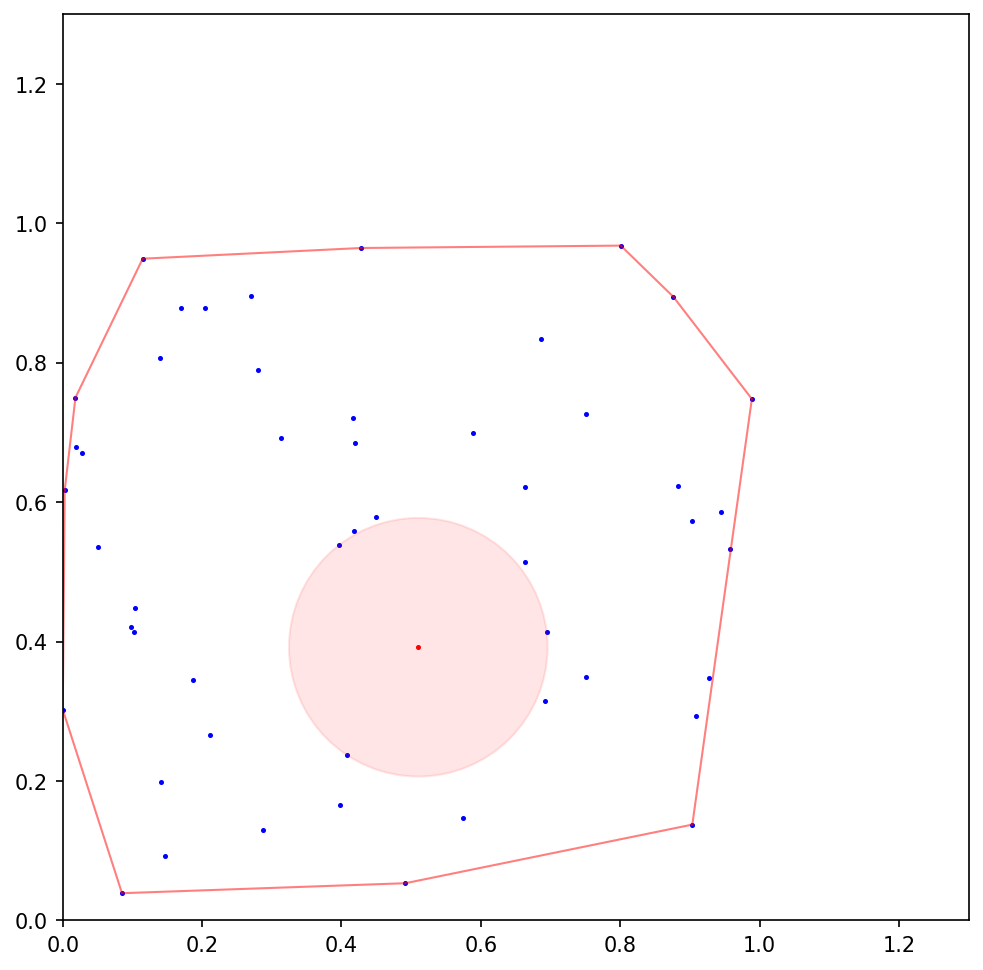

In [161]:
from collections import defaultdict

'''判断沃罗诺伊图的顶点是否在凸包多边形内'''
n = 50
np.random.seed(1)
points2d = np.random.rand(n,2)
vo = spatial.Voronoi(points2d) #沃罗诺伊图运算
ch = spatial.ConvexHull(points2d) #凸包运算
poly = plt.Polygon(points2d[ch.vertices]) #凸包多边形绘制
vs = vo.vertices
convexhull_mask = [poly.contains_point(p,radius=0) for p in vs] #判断vs中的点是否在凸包多边形内,若在内则返回True，否则返回False。返回一个布尔数组

'''对于满足要求的每个顶点，得到与每个顶点相连的区域内的胞点列表'''
vertice_point_map = defaultdict(list) #字典的值为一个列表
for index_point,index_region in enumerate(vo.point_region):
    region = vo.regions[index_region] #每个胞点所在区域所有顶点在vertices中的序号
    if -1 in region:continue #跳过存在无限边界的区域
    for index_vertice in region:#区域顶点序号循环
        if convexhull_mask[index_vertice]: #选择每个在凸包多边形内的顶点
            vertice_point_map[index_vertice].append(index_point) #产生一个字典，字典键是顶点编号，值是一个列表，列表内每个值为与顶点相接的区域内个胞点编号。

'''两点距离'''
def dist(p1,p2):
    return ((p1-p2)**2).sum()**0.5
'''求最大距离点，并获得半径和顶点位置'''
max_cicle = max((dist(points2d[pidxs[0]],vs[vidx]),vs[vidx]) 
                for vidx,pidxs in vertice_point_map.items())
radius,center = max_cicle
print('radius = ' , radius,'center =' ,center)

from matplotlib.patches import Circle ##添加库
fig = plt.figure(figsize=(8,8), dpi=150)
ax = fig.add_subplot(111)#创建子图
ax.set_aspect("equal")
ax.set_xlim(0, 1.3)
ax.set_ylim(0, 1.3)

'''绘制点阵'''
plt.scatter(points2d[:,0],points2d[:,1],color="blue",marker='o',s=2)

'''绘制凸包'''
for i in range(len(ch.simplices)):
    plt.plot(points2d[ch.simplices[i]][:,0],points2d[ch.simplices[i]][:,1],color='red', alpha=0.5, linewidth=1.0, linestyle="-")#绘制线段

'''绘制最大半径圆'''
plt.scatter(center[0],center[1],color="red",marker='o',s=2)#绘制满足要求点
circle = Circle(xy=(center[0], center[1]), radius=radius, alpha=0.1, color='r')#以target创建目标点范围，
ax.add_patch(circle)#将圆形贴图添加到子图

plt.show()

## 德劳内三角化

    德劳内三角化算法对给定的点集合的凸包进行三角形分割， 使得每个三角形的外接圆都不含任何点。spatial.Delaunay()可以对点阵进行德劳内三角化得到德劳内对象。
    Delaunay.simplices(): 返回值为一个二维数组，每个子数组返回每个三角形顶点在points2d中的下标，数组长度为三角形个数。三角形外接圆的圆心可以通过三点坐标计算，也可以使用沃罗诺伊图的vertices属性，vertices就是每个外接圆的圆心。

[[8 5 7]
 [1 5 3]
 [5 6 7]
 [6 0 7]
 [0 6 2]
 [6 1 2]
 [1 6 5]
 [9 5 8]
 [4 9 8]
 [5 9 3]
 [9 4 3]]


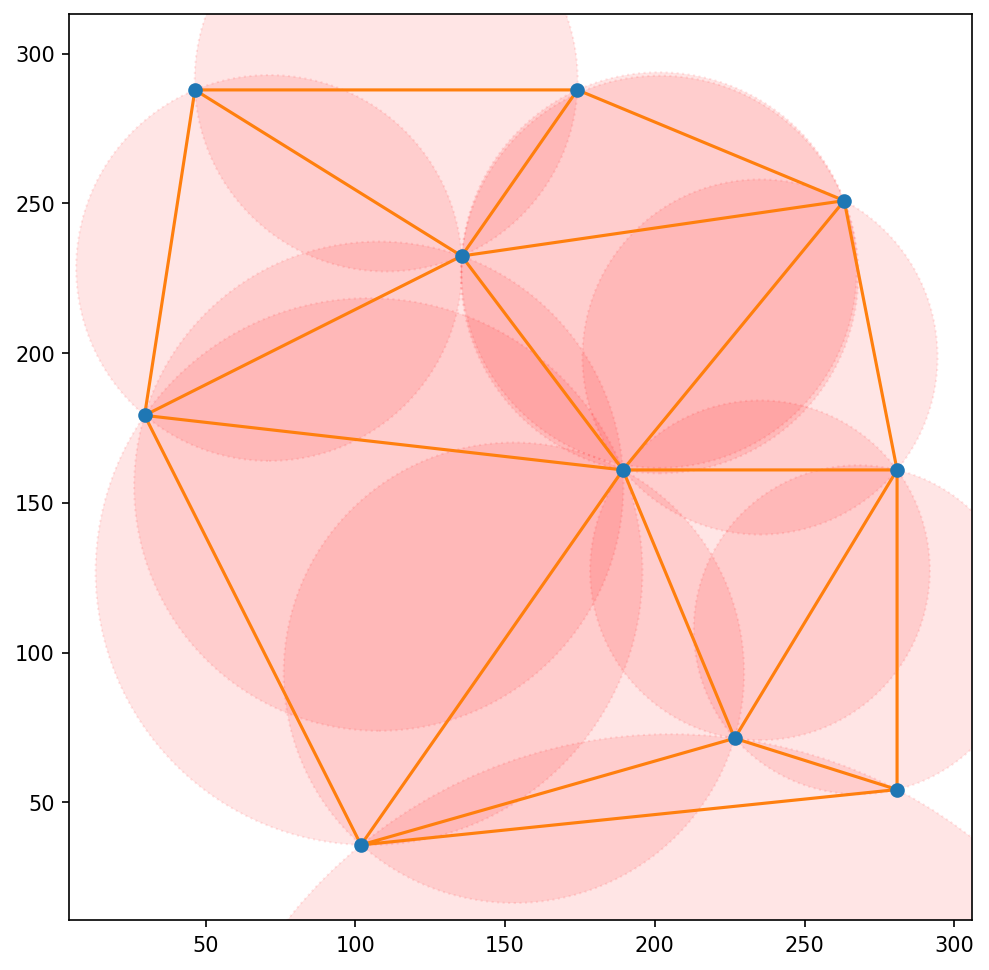

In [155]:
x = np.array([46.445, 263.251, 174.176, 280.899, 280.899,189.358, 135.521, 29.638, 101.907, 226.665])
y = np.array([287.865, 250.891, 287.865, 160.975, 54.252,160.975, 232.404, 179.187, 35.765, 71.361])
points2d = np.c_[x,y] #将x数组和y数组组合为散点坐标
dy = spatial.Delaunay(points2d) #德劳内三角化算法
vo = spatial.Voronoi(points2d) #沃罗诺伊算法
print(dy.simplices)

from matplotlib.patches import Circle ##添加库
fig = plt.figure(figsize=(8,8), dpi=150)
ax = fig.add_subplot(111)#创建子图
ax.set_aspect("equal")
ax.set_xlim(0, 350)
ax.set_ylim(0, 350)

'''绘制点阵'''
ax.scatter(points2d[:,0],points2d[:,1],color="blue",marker='o',s=2)

'''绘制三角形'''
spatial.delaunay_plot_2d(dy,ax=ax)
# for triangle in dy.simplices:
#     print(points2d[triangle])
#     print(points2d[triangle][:,0],points2d[triangle][:,1])
#     plt.plot(points2d[triangle][:,0],points2d[triangle][:,1],color='red', alpha=0.5,linewidth=1.0, linestyle="-")#绘制线段

'''绘制外接圆'''
# plt.scatter(center[0],center[1],color="red",marker='o',s=2)#绘制满足要求点
for i,(cx,cy) in enumerate(vo.vertices):
    px,py = points2d[dy.simplices[i,0]]
    radius = np.hypot(cx-px,cy-py)
    circle = Circle(xy=(cx, cy), radius=radius, alpha=0.1,color='red' ,ls="dotted")#以target创建目标点范围，
    ax.add_patch(circle)#将圆形贴图添加到子图

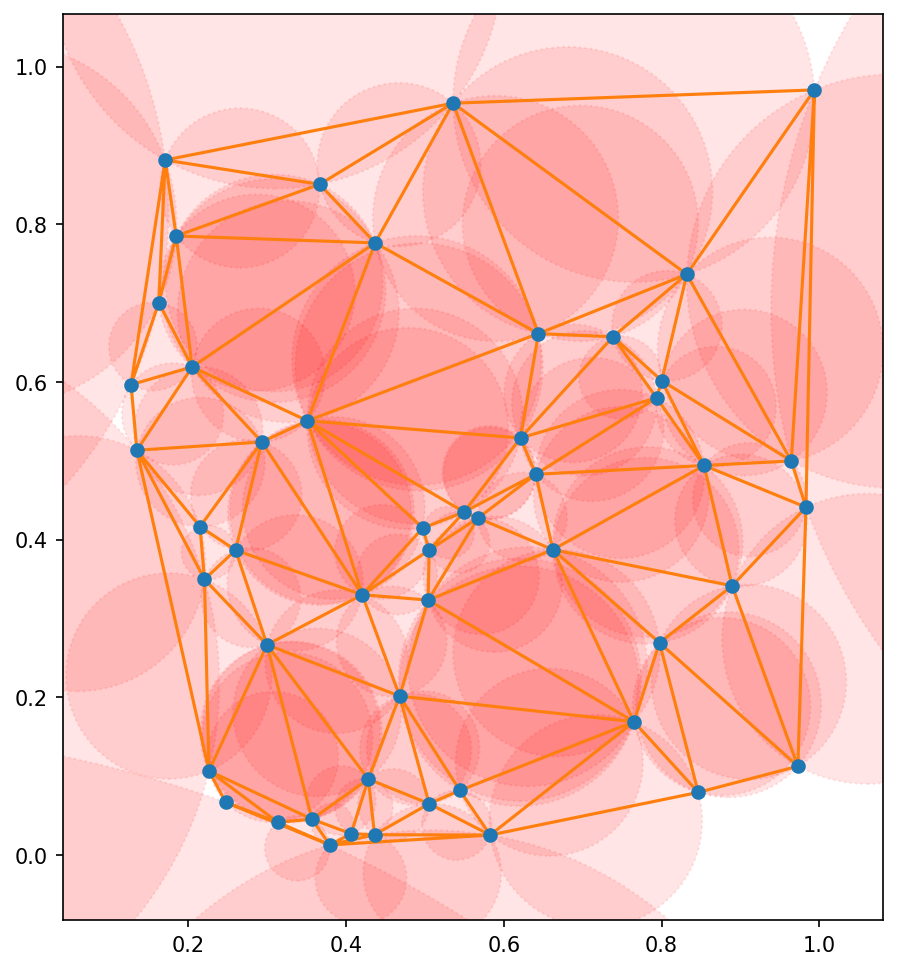

In [166]:
n = 50
np.random.seed(2)
points2d = np.random.rand(n,2)
dy = spatial.Delaunay(points2d) #德劳内三角化算法
vo = spatial.Voronoi(points2d) #沃罗诺伊算法
# print(dy.simplices)

from matplotlib.patches import Circle ##添加库
fig = plt.figure(figsize=(8,8), dpi=150)
ax = fig.add_subplot(111)#创建子图
ax.set_aspect("equal")
ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)

'''绘制点阵'''
ax.scatter(points2d[:,0],points2d[:,1],color="blue",marker='o',s=2)

'''绘制三角形'''
spatial.delaunay_plot_2d(dy,ax=ax)
# for triangle in dy.simplices:
#     print(points2d[triangle])
#     print(points2d[triangle][:,0],points2d[triangle][:,1])
#     plt.plot(points2d[triangle][:,0],points2d[triangle][:,1],color='red', alpha=0.5,linewidth=1.0, linestyle="-")#绘制线段

'''绘制外接圆'''
# plt.scatter(center[0],center[1],color="red",marker='o',s=2)#绘制满足要求点
for i,(cx,cy) in enumerate(vo.vertices):
    px,py = points2d[dy.simplices[i,0]]
    radius = np.hypot(cx-px,cy-py)
    circle = Circle(xy=(cx, cy), radius=radius, alpha=0.1,color='red' ,ls="dotted")#以target创建目标点范围，
    ax.add_patch(circle)#将圆形贴图添加到子图